# Have Fun Analityc

# Kasus Tim Roket

## Description
Tanpa disangka di tengah libur bootcamp minggu pertama saya bertemu dengan 2 orang yang tak asing. Rupanya mereka adalah tim Roket. FYI, Tim Roket adalah 2 orang pemuda yang memiliki hobi aneh. Tim roket gemar memburu dan mencuri pokemon milik orang lain. Hobi aneh lainnya, Tim roket sangat gemar terbang ke angkasa dan menjadi bintang di setiap akhir perburuan mereka (perburuan yang gagal).

Bosan terus2an gagal dalam perburuan, Tim roket memutuskan untuk bertaubat. Tim roket saat ini hanya berburu pokemon yang belum dimiliki orang lain. Tempat mereka berburu adalah di salah satu Hutan di Pokeverse. Sialnya, Tim roket kehilangan salah satu alat mereka yang bisa digunakan untuk melihat __stat__ pokemon. Tim roket memiliki buku database pokemon yang berisi daftar pokemon beserta stat mereka. Sulit sekali untuk berburu sambil membaca buku.

Mendengar cerita mereka, saya memutuskan mendukung Tim Roket yang sudah taubat.

### Objective
Membantu Tim Roket menentukan karakter pokemon yang kuat agar memudahkan mereka dalam memperioritaskan buruannya

### Problem Statement

1. Melakukan analisa secara Universal dengan dataset yang ada.
2. Tipe Pokemon apa saja yang paling banyak di Pokeverse?
3. Siapa saja **Pokemon Terkuat** dan **Pokemon Terlemah** di Pokeverse?
4. Pokemon dengan karakter seperti apa yang cenderung lebih kuat daripada pokemon lainnya?

## Working Area

### Import Library

**Pertama** saya perlu mengimport 2 library yang akan membantu saya menganalisa data Pokemon

In [3]:
import pandas as pd ##import library Pandas untuk mengelola data tabular
import numpy as np ##Import library Numpy untuk perhitungan aljabar

### Data Loading
**Kedua**, membuka/load `Pokemon.csv`

In [4]:
pokemon=pd.read_csv('Pokemon.csv') ##loading data Pokemon csv

### Analisa Data Universal
Untuk mengawali analisa, saya biasa melihat dataset secara luas dengan menggunakan fungsi .describe() dan .info()

In [5]:
pokemon.describe() #melihat data numerik secara universal

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
pokemon.info() ##melihat data kolom beserta tipe datanya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Untuk mempermudah pekerjaan saya selanjutnya saya merubah kolom pertama '#' menjadi 'id' agar lebih mudah untuk diingat

In [7]:
pokemon.rename(columns={'#':'Id'}, inplace=True)## Merubah kolom '#' menjadi 'Id'

#### Kesimpulan sementara dari analisa data Universal
Hmm ada pokemon yang hanya memiliki HP hanya 1. Pokemon apa?

In [8]:
pokemon[
    (pokemon['HP']==1) ## Query untuk meencari Pokemon yang HP ==1
]

,Id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False


> Poor Shedinja

Terdapat perbedaan jumlah data antara jumlah data `Type 1` dan `Type 2`. Data ini mengindikasikan bahwa ada pokemon yang tidak memiliki Type 2. Berapa banyak dan siapa saja?

In [9]:
pokemon[    ## Query untuk mencari pokemon dengan type 2 bernilai null
    pokemon['Type 2'].isnull()
    ][['Name']]

,Name
4,Charmander
5,Charmeleon
9,Squirtle
10,Wartortle
11,Blastoise
...,...
775,Sliggoo
776,Goodra
788,Bergmite
789,Avalugg


Terdapat **386** pokemon yang haya memiliki **1 type**

### Menentukan Karakter Pokemon yang seharusnya diprioritaskan

Pertama yang perlu dilakukan adalah menginvestivigasi jumlah **pokemon paling banyak** di pokeverse. Dengan mengetahui tipe **pokemon paling banyak** di pokeverse, saya bisa menyarankan Tim Roket agar memiliki Pokemon yang merupakan **counter** dari tipe pokemon tersebut

In [10]:
pokemon.groupby('Type 1')['Name'].count().sort_values(ascending=False) # Menghitung jumlah pokemon pada setiap Type 1

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Name, dtype: int64

In [11]:
pokemon.groupby('Type 2')['Name'].count().sort_values(ascending=False) # Menghitung jumlah pokemon pada setiap Type 2

Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Water       14
Ice         14
Ghost       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Name, dtype: int64

Type pokemon paling banyak adalah pokemon dengan type **`Water`**, **`Normal`**, dan **`Grass`** pada Tipe 1
Sedangkan pada type 2 pokemon paling banyak adalah **`Flying`**, **`Ground`**, dan **`Poison`**. Jumlah Pokemon dengan tipe flying di type 2 memiliki perbedaan jumlah yang signifikan dibanding tipe lainnya. Penting untuk Tim Roket memiliki **counter** dari pokemon `flying` dan `Water`

### Menemukan 10 Pokemon Terkuat dan Terlemah

Sebagai tambahan Insigth, saya perlu menunjukkan 10 Pokemon terkuat dan 10 Pokemon Terlemah kepada Tim Roket. Saya mengansumsikan bahwa `Total` menggambarkan kekuatan setiap pokemon.

#### 10 Terkuat

In [12]:
terkuat=pokemon.sort_values(['Total'], ascending=False).head(10) #Query untuk menentukan 10 pokemon dengan Total tertinggi
terkuat

,Id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False


#### 10 Terlemah

In [13]:
terlemah=pokemon.sort_values(['Total'], ascending=False).tail(10) #Query untuk menentukan 10 pokemon dengan Total terendah
terlemah

,Id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
732,664,Scatterbug,Bug,NaN,200,38,35,40,27,25,35,6,False
381,349,Feebas,Water,NaN,200,20,15,20,10,55,80,3,False
303,280,Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
288,265,Wurmple,Bug,NaN,195,45,45,35,20,30,20,3,False
446,401,Kricketot,Bug,NaN,194,37,25,41,25,41,25,4,False
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
206,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False


****10 Pokemon terkuat**** didominasi oleh pokemon bertype `Dragon` sebanyak 4 Pokemon, sedangkan **10 Pokemon terlemah** didominasi oleh pokemon bertipe `Bug`. Kita juga bisa melihat bahwa **10 Pokemon terkuat** sebagian besar memiliki `2 tipe`, berbeda halnya dengan **10 pokemon terlemah** yang sebagian besar adalah pokemon yang hanya memiliki` 1 type`. **10 Pokemon terkuat** juga sebagian besar diisi oleh pokemon `Legendary`, sebaliknya **10 Pokemon terlemah** diisi oleh pokemon `non-Legendary`.

Data ini akan membantu **Tim Roket** ketika bertemu lebih dari 1 pokemon di satu waktu, saya menyarankan **Tim Roket** lebih memprioritaskan Pokemon `Dragon` daripada `Bug`, pokemon dengan `2 tipe` daripada `1 tipe`, dan pokemon `legendaris` daripada `nonlegendaris`

### Menentukan Karakter Pokemon terkuat

**Tim Roket** walaupun tidak hafal stat setiap pokemon, tapi mereka dapat mengenali tipe pokemon dan status legendarisnya dari tampak fisiknya saja. Saya memutuskan untuk melihat kembali data secara menyeluruh serta menambahkan 1 kolom baru (Rangking) untuk membantu Tim Roket memprioritaskan perburuan pokemon berdasarkan stat `Tipe 1`, `Tipe 2` dan `Legendaris`.

<AxesSubplot:xlabel='Type 1'>

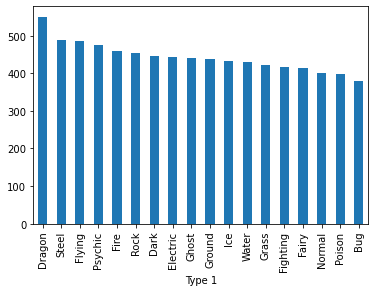

In [14]:
pokemon.groupby('Type 1')['Total'].mean().sort_values(ascending=False).plot.bar() #membuat grafik bar rata-rata Total setiap tipe 1

<AxesSubplot:xlabel='Type 2'>

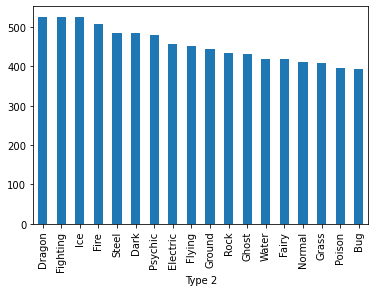

In [15]:
pokemon.groupby('Type 2')['Total'].mean().sort_values(ascending=False).plot.bar() #membuat grafik bar rata-rata Total setiap tipe 2

Berdasarkan Type 1 maupun Type 2, pokemon terkuat adalah `Dragon` dan pokemon terlemah adalah `Bug`. Kesimpulan ini dikuatkan oleh analisa kita sebelumnya dimana `Dragon` Mendominasi **10 Pokemon Terkuat** dan `Bug` Mendominasi **10 Pokemon Terlemah**

Saya juga perlu melihat bagimana jika saya mengasumsikan bahwa `Type 1` dan `Type 2` tidak mempengaruhi dalam pertarungan jika nilai keduanya tertukar. Saya yakin analisa tersebut akan membantu banyak saya dalam menyimpulkan tipe Pokemon Terkuat di Pokeverse.
Maka perlu dibuat dataFrame baru agar saya menyimpulkan dari data yang lebih universal

Membuat dataframe dari potongan dataframe pokemon kolom `Type 1` dan `Total`

In [54]:
tipe1=pokemon.loc[:,['Type 1', 'Total']]
tipe1.rename(columns={'Type 1': 'Type'}, inplace=True) #merubah kolom 'Type 1' menjadi 'Type' agar nanti mudah di lakukan concate

Membuat dataframe dari potongan dataframe pokemon kolom `Type 2` dan `Total`

In [56]:
tipe2=pokemon.loc[:,['Type 2', 'Total']]
tipe2.rename(columns={'Type 2': 'Type'}, inplace=True) #merubah kolom 'Type 2' menjadi 'Type' agar nanti mudah di lakukan concate

Menggabungkan `tipe1` dan `tipe2` serta membersihkan data yang `NaN`

In [59]:
data_tipe=pd.concat([tipe1,tipe2]) #menggabungkan 2 dataframe
data_tipe.dropna(inplace=True) # menghapus baris yang memiliki data NaN

<AxesSubplot:xlabel='Type'>

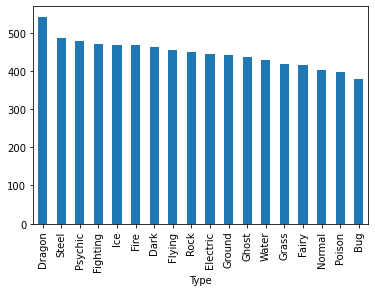

In [58]:
data_tipe.groupby('Type')['Total'].mean().sort_values(ascending=False).plot.bar()

Jika dilihat dengan data tunggal pokemon dengan tipe `Dragon` merupakan tipe pokemon terkuat. Jadi sangat wajar ketika 10 pokemon terkuat didominasi oleh pokemon bertipe `Dragon`.
Pertanyannya, seberapa kuat pokemon bertipe `Dragon`

In [ ]:
persentase=(data_tipe[(data_tipe['Type']=='Dragon')]['Total'].mean()-data_tipe[(data_tipe['Type']!='Dragon')]['Total'].mean())/data_tipe[(data_tipe['Type']=='Dragon')]['Total'].mean()*100
print(f"dragon lebih kuat {persentase}% daripada pokemon lainnya" )

dragon lebih kuat 19.11972534978271% daripada pokemon lainnya


Terakhir saya perlu memperhitungkan apakah pokemon legendaris lebih kuat daripada pokemon non legendaris?

<AxesSubplot:xlabel='Legendary'>

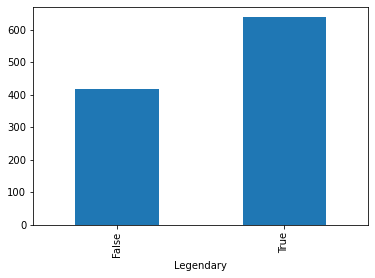

In [46]:
pokemon.groupby('Legendary')['Total'].mean().plot.bar()

Pokemon `Legendary` memiliki rata-rata total stats yang lebih tinggi dibandingkan pokemon yang bukan legendary.

Seberapa kuat Pokemon `Legendaris`?

In [52]:
persentase=(pokemon[(pokemon['Legendary']==True)]['Total'].mean()-pokemon[(pokemon['Legendary']==False)]['Total'].mean())/pokemon[(pokemon['Legendary']==True)]['Total'].mean()
print(f"Pokemon Legendary lebih kuat {persentase*100}% daripada pokemon lainnya" )

Pokemon Legendary lebih kuat 34.542881115757915% daripada pokemon lainnya


## Conclusions, Assumptions, Overall Analysis

Setelah dilakukan analisa, saya menyimpulkan beberapa hal, yakni
1. Tim Roket perlu memiliki pokemon yang merupakan counter dari pokemon tipe `water` dan `flying`, karena kedua pokemon tersebut merupakan pokemon paling banyak di pokeverse.
2. Tim Roket perlu mencatat 10 Pokemon Terkuat agar langsung memprioritaskan perburuan pokemon kepada 10 pokemon tersebut.
3. Dalam perburuannya saya menyarankan **Tim Roket** lebih memprioritaskan Pokemon `Dragon`
4. Pokemon dengan `2 tipe` cenderung lebih kuat daripada `1 tipe` dan pokemon `legendaris` cenderung lebih kuat daripada `nonlegendaris`
5, Tim Roket perlu melihat status `Legendaris` Terlebih dahulu daripada stat `Tipe` Hal ini karena stat `Legendaris` cenderung lebih memberikan perbedaan yang signifikan kepada kekuatan pokemon daripada stat `Tipe`